In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
'''we import the needed libaries, including request an beautilful soup for the data fetching, pandas
for data analysis and seaborn for data visualization''' 

data = []

#a array to store our data. 


In [53]:
for x in range(1,31):
    URL = "https://www.endurance-data.com/en/results/597-ironman-barcelona/all/" + str(x) +"/"
    print(URL)
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    table = soup.find('table', attrs={'class':'table table-hover table-striped table-bordered table-bordered-inner mb-0'})
    rows = table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele]) 
        
# we loop through the pages and extract the data    

https://www.endurance-data.com/en/results/597-ironman-barcelona/all/1/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/2/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/3/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/4/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/5/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/6/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/7/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/8/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/9/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/10/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/11/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/12/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/13/
https://www.endurance-data.com/en/results/597-ironman-barcelona/all/14/
h

In [54]:
# we convert the array tp a pandas data frame and store it 
df=pd.DataFrame(data)
df.to_csv('Barcelona8.csv')
df2 = df


In [5]:
df.describe()
#take a look at the data

,0,1,2,3,4,5,6,7,8,9,10
count,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496
unique,1496,1302,282,1496,1496,24,68,494,1389,1404,1426
top,546,193,1,Jürg Gloor,350,M45-49,GBR,00:11:53,05:36:39,04:46:43,09:42:54
freq,1,2,24,1,1,281,376,12,3,4,3


In [64]:
# we can see that the row we the index 1 seems useless and we have to rename our columns 
df.columns = ['OverallRank','GenderRank','DivRank','Name','BIB-Number','AgeGroup','Nationality','SwimTime','BikeTime','RunTime','OverallTime']
#df = df.drop(0)
# besides we have nan values in our data let's get rid of it
df = df.dropna(how='all')

df.head(104)

,OverallRank,GenderRank,DivRank,Name,BIB-Number,AgeGroup,Nationality,SwimTime,BikeTime,RunTime,OverallTime
1,1,1,1,Kristian Ek,120,M30-34,SWE,00:08:48,04:30:10,03:01:55,07:46:43
2,2,2,1,Christopher Wehrle,955,MPRO,DEU,00:08:48,04:35:51,02:58:13,07:49:13
3,3,3,2,Alexis Krug,1083,M30-34,BEL,00:07:40,04:39:31,02:54:50,07:50:15
4,4,4,1,Bart Schrooyen,414,M35-39,BEL,00:08:43,04:39:28,03:03:21,07:57:49
5,5,5,3,Pawel Mlodzikowski,1031,M30-34,POL,00:10:20,04:36:00,03:05:17,07:58:12
6,6,6,1,Juan Damasceno Llorca Barberá,1610,M40-44,ESP,00:09:06,04:41:16,03:01:24,07:58:54
7,7,7,1,Marcin Konieczny,2090,M45-49,POL,00:09:57,04:37:09,03:04:30,07:59:08
8,8,8,2,Anton Lavrov,148,M40-44,RUS,00:08:21,04:37:07,03:09:16,08:01:26
9,9,9,1,Raphael Leroy,935,M25-29,FRA,00:10:40,04:39:18,03:05:51,08:02:20
10,10,10,3,Djalil Baiou,1700,M40-44,GBR,00:09:03,04:37:59,03:08:40,08:04:00


In [62]:
df.describe()
# in the following we discover the data

,OverallRank,GenderRank,DivRank,Name,BIB-Number,AgeGroup,Nationality,SwimTime,BikeTime,RunTime,OverallTime
count,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496
unique,1496,1302,282,1496,1496,24,68,494,1389,1404,1426
top,546,193,1,Jürg Gloor,350,M45-49,GBR,00:11:53,05:36:39,04:46:43,09:42:54
freq,1,2,24,1,1,281,376,12,3,4,3


In [68]:

# as we can see all columns have the data type Object, so we have to convert them to their appropiate format
df["OverallRank"] = df["OverallRank"].astype(str).astype(int)
df["GenderRank"] = df["GenderRank"].astype(str).astype(int)
df["DivRank"] = df["DivRank"].astype(str).astype(int)
df["BIB-Number"] = df["BIB-Number"].astype(str).astype(int)

df['BikeTime'] = pd.to_datetime(df['BikeTime'], format='%H:%M:%S')
df['SwimTime'] = pd.to_datetime(df['SwimTime'], format='%H:%M:%S')
df['RunTime'] = pd.to_datetime(df['RunTime'], format='%H:%M:%S')
df['OverallTime'] = pd.to_datetime(df['OverallTime'], format='%H:%M:%S')

df.dtypes

OverallRank             int32
GenderRank              int32
DivRank                 int32
Name                   object
BIB-Number              int32
AgeGroup               object
Nationality            object
SwimTime       datetime64[ns]
BikeTime       datetime64[ns]
RunTime        datetime64[ns]
OverallTime    datetime64[ns]
dtype: object

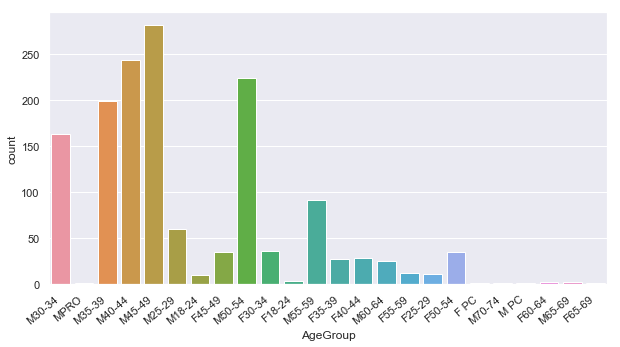

In [79]:
#let's check how the numebr of participants in the age groups compare

sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.countplot(x="AgeGroup", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

Picture = ax.get_figure()
Picture.savefig("CountAgegroup.png") 

In [84]:
#df.to_pickle("./Barcelona.pkl")  
'''Time to calculate the Relative Rank in their agegroup first we have to count the number of participants
in the particular age group and later calculate the relative place'''
df = df.join(df.groupby(by=["AgeGroup"]).count().iloc[1:,0].rename('ParticipantsAgeGroup'), on='AgeGroup')

In [87]:
# Calculation of relative Rank within AgeGroup
df['RelativeRankAgeGroup'] = df['DivRank'] / df['ParticipantsAgeGroup']

In [88]:
df.head()

,OverallRank,GenderRank,DivRank,Name,BIB-Number,AgeGroup,Nationality,SwimTime,BikeTime,RunTime,OverallTime,ParticipantsAgeGroup,RelativeRankAgeGroup
1,1,1,1,Kristian Ek,120,M30-34,SWE,1900-01-01 00:08:48,1900-01-01 04:30:10,1900-01-01 03:01:55,1900-01-01 07:46:43,163.0,0.006135
2,2,2,1,Christopher Wehrle,955,MPRO,DEU,1900-01-01 00:08:48,1900-01-01 04:35:51,1900-01-01 02:58:13,1900-01-01 07:49:13,1.0,1.000000
3,3,3,2,Alexis Krug,1083,M30-34,BEL,1900-01-01 00:07:40,1900-01-01 04:39:31,1900-01-01 02:54:50,1900-01-01 07:50:15,163.0,0.012270
4,4,4,1,Bart Schrooyen,414,M35-39,BEL,1900-01-01 00:08:43,1900-01-01 04:39:28,1900-01-01 03:03:21,1900-01-01 07:57:49,199.0,0.005025
5,5,5,3,Pawel Mlodzikowski,1031,M30-34,POL,1900-01-01 00:10:20,1900-01-01 04:36:00,1900-01-01 03:05:17,1900-01-01 07:58:12,163.0,0.018405


In [149]:
#Now we have to take the average relative Rank grouped by nation to set it in perspective
dfNationRank = df.groupby('Nationality').mean()
dfNationCount = df.groupby('Nationality').count()

In [150]:

dfNationRank = dfNationRank.sort_values(by=['RelativeRankAgeGroup'])

In [151]:
'''in the unfiltered data ALB is the best country , to get representatives value we exclude countries
with less than 15 particpipants and transform the data, so we can compare the Nations'''
indexNames = dfNationCount[ dfNationCount['Name'] < 15 ].index
dfNationCount.drop(indexNames , inplace=True)

In [152]:
# Adding a suffix so a suffix so we don't get any join errors
dfNationRank = dfNationRank.add_suffix('NR')

In [153]:
dfNationCount= dfNationCount.join(dfNationRank)

In [ ]:
dfNationCount = dfNationCount.sort_values(by=['RelativeRankAgeGroupNR'])

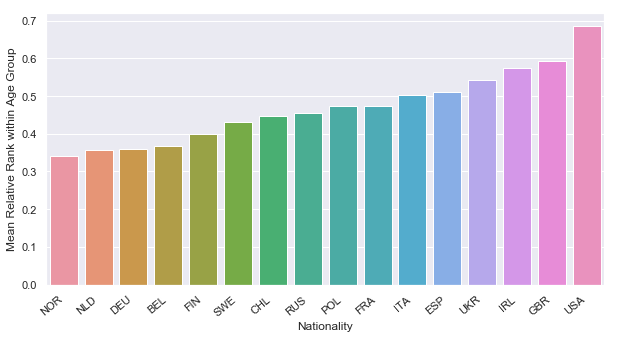

In [140]:
# graph of the average relative rank by nation 
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.barplot(x=dfNationCount.index, y="RelativeRankAgeGroupNR", data=dfNationCount)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(ylabel='Mean Relative Rank within Age Group')
Picture = ax.get_figure()
Picture.savefig("NationComparisonRank.png") 

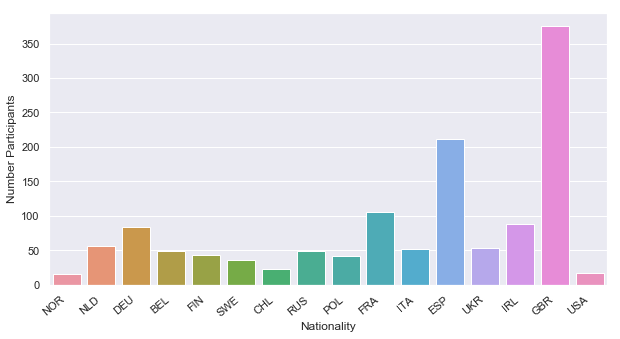

In [141]:
# the number of participants to set it into perspective 
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.barplot(x=dfNationCount.index, y="Name", data=dfNationCount)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set(ylabel='Number Participants')
Picture = ax.get_figure()
Picture.savefig("NationComparisonCount.png") 

In [ ]:
'''For question two we will basically repeat the steps with different values, but as it turns out
timestamps are not suitable for mean operations why we will Transform the Time to seconds
'''

In [185]:
df['SwimSeconds'] = (df['SwimTime']- pd.datetime(1900, 1, 1, 0, 0, 0)).dt.total_seconds()
df['BikeSeconds'] = (df['BikeTime']- pd.datetime(1900, 1, 1, 0, 0, 0)).dt.total_seconds()
df['RunSeconds'] = (df['RunTime']- pd.datetime(1900, 1, 1, 0, 0, 0)).dt.total_seconds()

In [196]:
dfAvgTimes = df.groupby(by=["AgeGroup"],as_index=False).mean()

In [197]:
dfAvgTimes = dfAvgTimes.add_suffix('_AVG')

In [198]:
df

,OverallRank,GenderRank,DivRank,Name,BIB-Number,AgeGroup,Nationality,SwimTime,BikeTime,RunTime,OverallTime,ParticipantsAgeGroup,RelativeRankAgeGroup,DeltaSwim,SwimSeconds,BikeSeconds,RunSeconds
1,1,1,1,Kristian Ek,120,M30-34,SWE,1900-01-01 00:08:48,1900-01-01 04:30:10,1900-01-01 03:01:55,1900-01-01 07:46:43,163.0,0.006135,528.0,528.0,16210.0,10915.0
2,2,2,1,Christopher Wehrle,955,MPRO,DEU,1900-01-01 00:08:48,1900-01-01 04:35:51,1900-01-01 02:58:13,1900-01-01 07:49:13,1.0,1.000000,528.0,528.0,16551.0,10693.0
3,3,3,2,Alexis Krug,1083,M30-34,BEL,1900-01-01 00:07:40,1900-01-01 04:39:31,1900-01-01 02:54:50,1900-01-01 07:50:15,163.0,0.012270,460.0,460.0,16771.0,10490.0
4,4,4,1,Bart Schrooyen,414,M35-39,BEL,1900-01-01 00:08:43,1900-01-01 04:39:28,1900-01-01 03:03:21,1900-01-01 07:57:49,199.0,0.005025,523.0,523.0,16768.0,11001.0
5,5,5,3,Pawel Mlodzikowski,1031,M30-34,POL,1900-01-01 00:10:20,1900-01-01 04:36:00,1900-01-01 03:05:17,1900-01-01 07:58:12,163.0,0.018405,620.0,620.0,16560.0,11117.0
6,6,6,1,Juan Damasceno Llorca Barberá,1610,M40-44,ESP,1900-01-01 00:09:06,1900-01-01 04:41:16,1900-01-01 03:01:24,1900-01-01 07:58:54,243.0,0.004115,546.0,546.0,16876.0,10884.0
7,7,7,1,Marcin Konieczny,2090,M45-49,POL,1900-01-01 00:09:57,1900-01-01 04:37:09,1900-01-01 03:04:30,1900-01-01 07:59:08,281.0,0.003559,597.0,597.0,16629.0,11070.0
8,8,8,2,Anton Lavrov,148,M40-44,RUS,1900-01-01 00:08:21,1900-01-01 04:37:07,1900-01-01 03:09:16,1900-01-01 08:01:26,243.0,0.008230,501.0,501.0,16627.0,11356.0
9,9,9,1,Raphael Leroy,935,M25-29,FRA,1900-01-01 00:10:40,1900-01-01 04:39:18,1900-01-01 03:05:51,1900-01-01 08:02:20,60.0,0.016667,640.0,640.0,16758.0,11151.0
10,10,10,3,Djalil Baiou,1700,M40-44,GBR,1900-01-01 00:09:03,1900-01-01 04:37:59,1900-01-01 03:08:40,1900-01-01 08:04:00,243.0,0.012346,543.0,543.0,16679.0,11320.0


In [202]:
#Joining the Average times to the Dataframe

df = pd.merge(df,dfAvgTimes[['AgeGroup_AVG','SwimSeconds_AVG','BikeSeconds_AVG','RunSeconds_AVG']]
              ,left_on = 'AgeGroup', right_on = 'AgeGroup_AVG')

In [201]:
df.columns

Index(['OverallRank', 'GenderRank', 'DivRank', 'Name', 'BIB-Number',
       'AgeGroup', 'Nationality', 'SwimTime', 'BikeTime', 'RunTime',
       'OverallTime', 'ParticipantsAgeGroup', 'RelativeRankAgeGroup',
       'DeltaSwim', 'SwimSeconds', 'BikeSeconds', 'RunSeconds'],
      dtype='object')

In [203]:
#Calculating the Relative Times

df['RelativeSwimTimeAG'] = df['SwimSeconds'] / df['SwimSeconds_AVG']
df['RelativeBikeTimeAG'] = df['BikeSeconds'] / df['BikeSeconds_AVG']
df['RelativeRunTimeAG'] = df['RunSeconds'] / df['RunSeconds_AVG']

In [205]:
#Calculation the Difference in the Relative Times 
df['Eveness'] = df['RelativeBikeTimeAG'] - df['RelativeRunTimeAG']

In [214]:
df['EvenessRound']  = df['Eveness'] .round(1) 

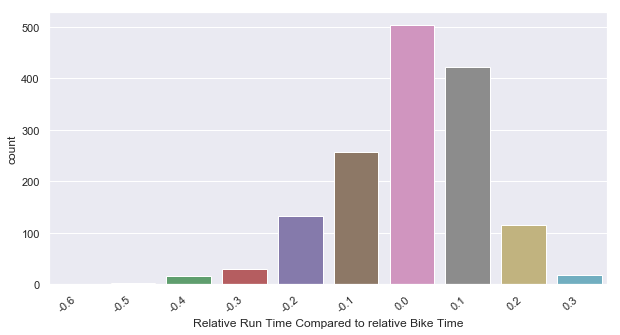

In [215]:
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.countplot(x="EvenessRound", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Relative Run Time Compared to relative Bike Time')
Picture = ax.get_figure()
Picture.savefig("Eveness.png") 

In [ ]:
'''Now we have to distingusih beetween the genders for that we have to add a gender

column and recalulate our graph we an additional dimension'''

In [217]:
df['Gender'] = df['AgeGroup'].astype(str).str[0]

In [219]:
'''To compare the relative number we have to add to add a percentage columns'''

'To compare the relative number we have to add to add a percentage columns'

In [245]:
dfNumberGender = df.groupby(by=["Gender"],as_index= False).count()

dfNumberGender = dfNumberGender.add_suffix('NG')

In [246]:
dfNumberGender

,GenderNG,OverallRankNG,GenderRankNG,DivRankNG,NameNG,BIB-NumberNG,AgeGroupNG,NationalityNG,SwimTimeNG,BikeTimeNG,...,BikeSeconds_AVGNG,RunSeconds_AVGNG,RelativeSwimTimeAGNG,RelativeBikeTimeAGNG,RelativeRunTimeAGNG,EvenessNG,EvenessRoundNG,ParticipantsGenderNG,ShareGenderNG,ParticipantsGender2NG
0,F,194,194,194,194,194,194,194,194,194,...,194,194,194,194,194,194,194,0,0,0
1,M,1302,1302,1302,1302,1302,1302,1302,1302,1302,...,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302


In [247]:
df = pd.merge(df,dfNumberGender[['GenderNG','NameNG']],left_on = 'Gender', right_on = 'GenderNG')

In [248]:
'''NameNG Contains the Number of Genders so we get the percentage'''
df['ShareGender'] =  1 / df['NameNG'] 

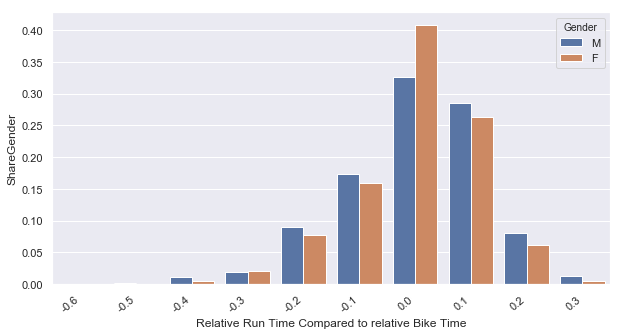

In [249]:
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.barplot(x="EvenessRound", y='ShareGender',hue='Gender' ,data=df,  estimator=sum)
'''we have to estimate the sum'''
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Relative Run Time Compared to relative Bike Time')
Picture = ax.get_figure()
Picture.savefig("Evenes2s.png") 